<a href="https://colab.research.google.com/github/seokmin1/PDM08/blob/main/py-tensorflow/pdm08_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning and Visualization (CNN's)

# Transfer Learning(TL)이란 
딥러닝을 feature extractor로만 사용해 추출한 피처를 가지고 다른모델을 learning하는것이다. 기존 모델을 사용해 새로운 모델을 만들어 학습을 빠르게 하고 예측을 높이는 방법이다. VGG, ResNet, gooGleNet등 사전에 학습이 완료된 모델을 가지고 원하는 학습에 변화를 이용해 학습시키는 방법을 말한다.

# cifar10에 대한 TL 결과 요약
 batch size값을 50으로 조정한 후 돌려보니 기존에 오류가 났던 데이터에서 문제 없이 실행이 됨 cifar10_pct100_mobilenetV2S_SGD_best_weights.048-0.7787.hdf5'라는 결과로 bestmodel이 출력 되었습니다. 마지막으로 confusion Matrix training를 통한 prediction 성능을 측정한 결과 예측 value 값은 77%센트가 나왔습니다 처음에는 모양이 밸런스가 맞지 않았지만 코드 오류로 인해서 수정한결과 지금의 결과가 나왔습니다


In [ ]:
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import  MobileNetV2, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import cv2
print(tf.__version__)

2.7.0


In [ ]:
tf.keras.backend.clear_session()  # For memory

# GPU check
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print("#### ", len(gpus), "Physical GPUs,",
                 len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print('#### No CUDA supported GPU in this computer.')

####  1 Physical GPUs, 1 Logical GPUs


In [ ]:
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
#print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
#print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
trainX, testX = trainX/255.0, testX/255.0 # 정규화

print("trainX{0}".format(trainX.shape))
print("trainy={0}".format(trainy.shape)) 
print("testX={0}".format(testX.shape))
print("testy={0}".format(testy.shape))

trainy.shape,testy.shape

170508288/170498071 [==============================] - 11s 0us/step
trainX(50000, 32, 32, 3)
trainy=(50000, 1)
testX=(10000, 32, 32, 3)
testy=(10000, 1)


((50000, 1), (10000, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical

trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)
trainy.shape,testy.shape

((50000, 10), (10000, 10))

In [ ]:
# y_train0.shape vs. y_train.shape
trainy.shape, trainy.shape

((50000, 10), (50000, 10))

3689


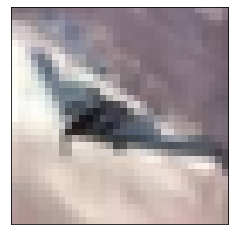

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, trainX.shape[0])
print(idx)
image = trainX[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
#plt.title(classes[trainy[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

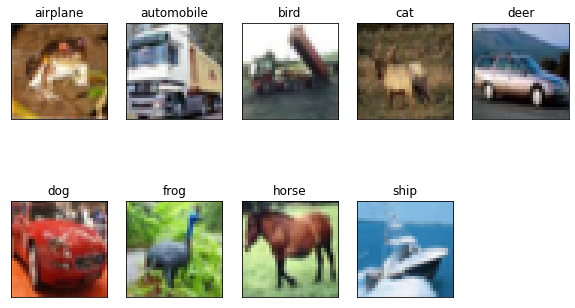

In [ ]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(trainy, return_index=True)[1]
images = trainX[num0_9]
for i in range(0,9):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(trainX[i])
    plt.title(classes[i])
    plt.xticks([])
    plt.yticks([])

In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = preprocess_input(input_images)
  return output_ims

In [ ]:
trainX = preprocess_image_input(trainX)
testX = preprocess_image_input(testX)

In [ ]:
x_train.shape,len(x_train),x_train[4].shape

((50000, 32, 32, 3), 50000, (32, 32, 3))

In [ ]:
trainy=trainy
testy=testy
trainy.shape,testy.shape

((50000, 1), (10000, 1))

In [ ]:
# TL_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
TL_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
len(TL_base.layers)

154

In [ ]:
# TL_base.layers[81].name,TL_base.layers[143].name  # resnet50
TL_base.layers[81].name,TL_base.layers[107].name # mobilenetV2

('block_9_expand', 'block_12_expand')

In [ ]:
TL_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
TL_base.layers[-1].get_config() # (7, 7, 1280)

{'dtype': 'float32',
 'max_value': array(6., dtype=float32),
 'name': 'out_relu',
 'negative_slope': array(0., dtype=float32),
 'threshold': array(0., dtype=float32),
 'trainable': True}

In [ ]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

# x_train=x_train/255.0
# x_test=x_test/255.0
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX = preprocess_input(trainX)
testX = preprocess_input(testX)

# No one-hot encoding
# trainy = np_utils.to_categorical(trainy, 10)
# testy = np_utils.to_categorical(testy, 10)

print(trainX.shape)
print(testX.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# Set TL_base trainable or not.
TL_base.trainable = False  # Use the representative features pretrained by resnet.

In [ ]:
model = models.Sequential()
model.add(keras.Input(shape=(32,32,3)))
model.add(layers.UpSampling2D((7,7)))  # 32*7 = 224
model.add(TL_base)
model.add(layers.GlobalAveragePooling2D()) # (7,7,2048) => (2048,)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

# model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',  # sparse_categorical_crossentropy
                metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_1 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 1280)             5120      
 hNormalization)                                      

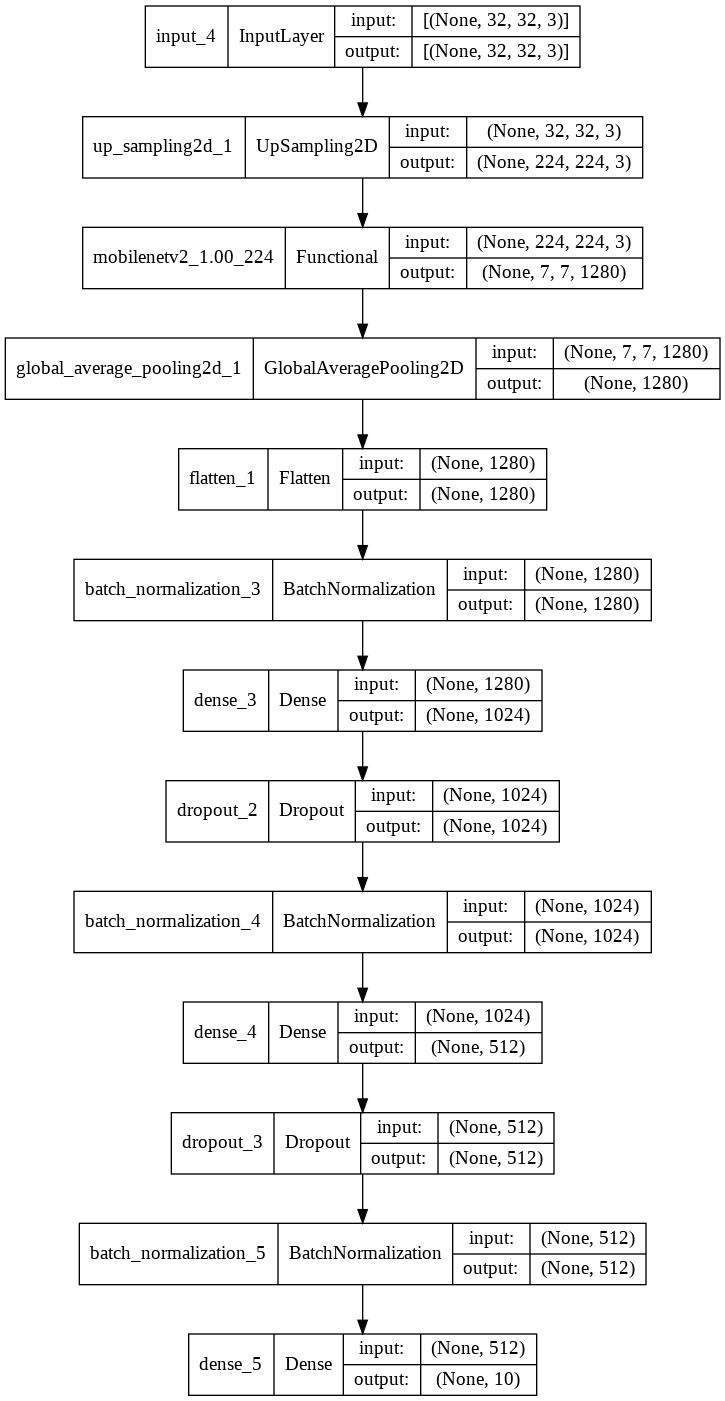

In [ ]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_S.png')

In [ ]:
from tensorflow.keras import layers, models, callbacks

In [ ]:
mc_callback = callbacks.ModelCheckpoint(filepath="./model/cifar10_pct100_mobilenetV2S_SGD_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)

In [ ]:
history = model.fit(trainX, trainy, 
                    epochs=100, batch_size=50, 
                    validation_data=(testX, testy),
                    callbacks=[mc_callback,es_callback])

Epoch 1/100
1000/1000 [==============================] - ETA: 0s - loss: 1.5285 - accuracy: 0.4827

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1000/1000 [==============================] - 179s 167ms/step - loss: 1.5285 - accuracy: 0.4827 - val_loss: 0.9672 - val_accuracy: 0.6584
Epoch 2/100
1000/1000 [==============================] - 147s 147ms/step - loss: 1.1407 - accuracy: 0.6021 - val_loss: 0.8851 - val_accuracy: 0.6883
Epoch 3/100
1000/1000 [==============================] - 147s 147ms/step - loss: 1.0299 - accuracy: 0.6390 - val_loss: 0.8456 - val_accuracy: 0.7027
Epoch 4/100
1000/1000 [==============================] - 148s 148ms/step - loss: 0.9754 - accuracy: 0.6574 - val_loss: 0.8135 - val_accuracy: 0.7136
Epoch 5/100
1000/1000 [==============================] - 148s 148ms/step - loss: 0.9300 - accuracy: 0.6742 - val_loss: 0.7938 - val_accuracy: 0.7183
Epoch 6/100
1000/1000 [==============================] - 165s 165ms/step - loss: 0.8987 - accuracy: 0.6841 - val_loss: 0.7743 - val_accuracy: 0.7259
Epoch 7/100
1000/1000 [==============================] - 148s 148ms/step - loss: 0.8709 - accuracy: 0.6938 - val_loss:

In [ ]:
model.evaluate(testX, testy, batch_size=50)

200/200 [==============================] - 24s 121ms/step - loss: 0.6488 - accuracy: 0.7766


[0.6488096714019775, 0.7766000032424927]

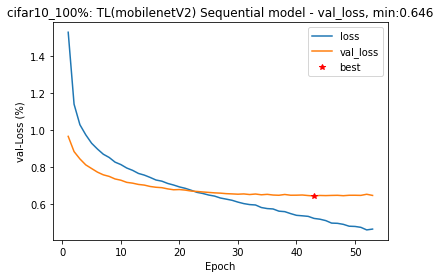

In [ ]:

epochs = range(1, len(history.history['loss']) + 1)

loss_list = history.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = history.history['val_loss'] #[100 * i for i in history.history['val_loss']]

plt.plot(epochs,loss_list)  
plt.plot(epochs,vloss_list)

plt.plot(np.argmin(np.array(vloss_list))+1,vloss_list[np.argmin(np.array(vloss_list))], 'r*')
plt.title('cifar10_100%: TL(mobilenetV2) Sequential model - val_loss, min:' + str(np.round(vloss_list[np.argmin(np.array(vloss_list))],3)))
plt.ylabel('val-Loss (%)')
plt.xlabel('Epoch')
plt.legend(['loss','val_loss','best'], loc='best')
plt.show()

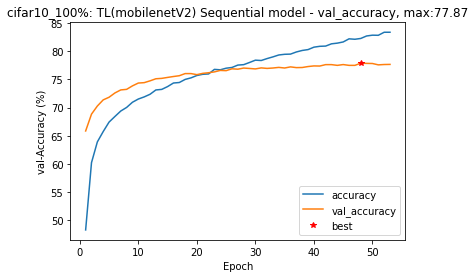

In [ ]:
# 훈련 데이터와 검증 데이터에 대한 accuracy 시각화.
epochs = range(1, len(history.history['accuracy']) + 1)

acc_list = [100 * i for i in history.history['accuracy']]
vacc_list = [100 * i for i in history.history['val_accuracy']]

plt.plot(epochs,acc_list)  
plt.plot(epochs,vacc_list)

plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('cifar10_100%: TL(mobilenetV2) Sequential model - val_accuracy, max:' + str(np.round(vacc_list[np.argmax(np.array(vacc_list))],3)))
plt.ylabel('val-Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')
plt.show()

In [ ]:
 model.save('cifar10_pct100_mobilenetV2S_SGD_best_weights.048-0.7787.hdf5')
# # Load the saved model
 model = tf.keras.models.load_model('cifar10_pct100_mobilenetV2S_SGD_best_weights.048-0.7787.hdf5')
 model.evaluate(testX, testy)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


313/313 [==============================] - 28s 85ms/step - loss: 0.6488 - accuracy: 0.7766


[0.6488096117973328, 0.7766000032424927]

In [ ]:
tf.keras.backend.clear_session()  # For memory
TL_base.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(TL_base.layers))

Number of layers in the base model:  154


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 107  # 81, 107 for mobilenetV2

# Freeze all the layers before the `fine_tune_at` layer
for layer in TL_base.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
# Compile model
model.compile(optimizer='SGD', 
                loss='sparse_categorical_crossentropy',  # sparse_categorical_crossentropy
                metrics = ['accuracy'])

In [ ]:
mc_callback = callbacks.ModelCheckpoint(filepath="./model/cifar10_pct100_mobileNetV2S_FT_SGD_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)

In [ ]:
history_dict = history.history
loss = history_dict['loss']
INITIAL_EPOCHS = len(loss)
FINE_TUNE_EPOCHS = 100
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS #

In [ ]:

history_fine = model.fit(trainX, trainy, 
                    epochs=TOTAL_EPOCHS, 
                    initial_epoch=INITIAL_EPOCHS,
                    batch_size=50, 
                    validation_data=(testX, testy),
                    callbacks=[mc_callback,es_callback])

Epoch 54/153
1000/1000 [==============================] - ETA: 0s - loss: 0.4578 - accuracy: 0.8360

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1000/1000 [==============================] - 153s 150ms/step - loss: 0.4578 - accuracy: 0.8360 - val_loss: 0.6486 - val_accuracy: 0.7777
Epoch 55/153
1000/1000 [==============================] - 148s 148ms/step - loss: 0.4470 - accuracy: 0.8390 - val_loss: 0.6497 - val_accuracy: 0.7776
Epoch 56/153
1000/1000 [==============================] - 148s 148ms/step - loss: 0.4469 - accuracy: 0.8378 - val_loss: 0.6525 - val_accuracy: 0.7794
Epoch 57/153
1000/1000 [==============================] - 165s 165ms/step - loss: 0.4296 - accuracy: 0.8459 - val_loss: 0.6507 - val_accuracy: 0.7795
Epoch 58/153
1000/1000 [==============================] - 166s 166ms/step - loss: 0.4283 - accuracy: 0.8462 - val_loss: 0.6543 - val_accuracy: 0.7772
Epoch 59/153
1000/1000 [==============================] - 148s 148ms/step - loss: 0.4267 - accuracy: 0.8464 - val_loss: 0.6539 - val_accuracy: 0.7791
Epoch 60/153
1000/1000 [==============================] - 166s 166ms/step - loss: 0.4172 - accuracy: 0.8495 - val

In [ ]:
model.evaluate(testX, testy, batch_size=50)

200/200 [==============================] - 24s 121ms/step - loss: 0.6744 - accuracy: 0.7807


[0.674394965171814, 0.7807000279426575]

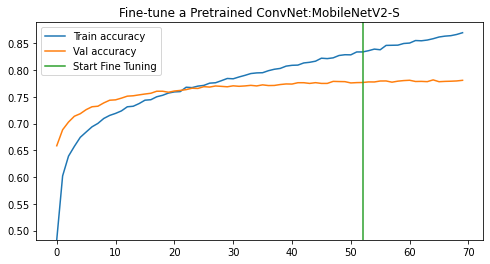

In [ ]:
# Display training curve

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.figure(figsize=(8, 4))

plt.plot(acc, label='Train accuracy')
plt.plot(val_acc, label='Val accuracy')
# plt.ylim([0.8, 1])
plt.plot([INITIAL_EPOCHS-1, INITIAL_EPOCHS-1], plt.ylim(ymin=acc[0]), label='Start Fine Tuning')
plt.title("Fine-tune a Pretrained ConvNet:MobileNetV2-S")
plt.legend(loc='upper left')

plt.show()

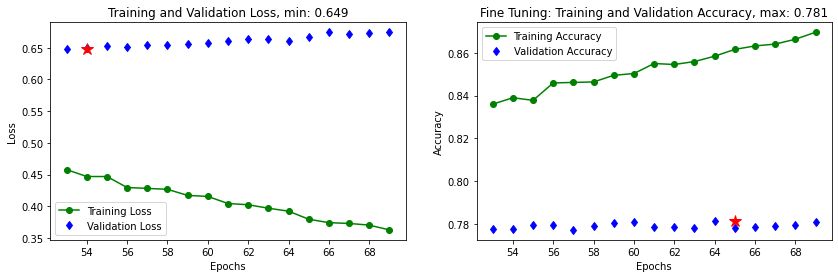

In [ ]:
# More graphs of loss and accuracy in Fine Tuning
history_dict = history_fine.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(INITIAL_EPOCHS, INITIAL_EPOCHS+len(loss))

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(INITIAL_EPOCHS + np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],3)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy')#, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(INITIAL_EPOCHS + np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Fine Tuning: Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],3)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Best Daug model

* cifar10_pct100_mobilenetV2S_SGD_best_weights.048-0.7787.hdf5

In [ ]:
from keras.models import load_model

model_best = load_model('./model/cifar10_pct100_mobilenetV2S_SGD_best_weights.048-0.7787.hdf5')
model_best.evaluate(testX, testy, batch_size=50)

200/200 [==============================] - 25s 121ms/step - loss: 0.6473 - accuracy: 0.7787


[0.6472916603088379, 0.7786999940872192]

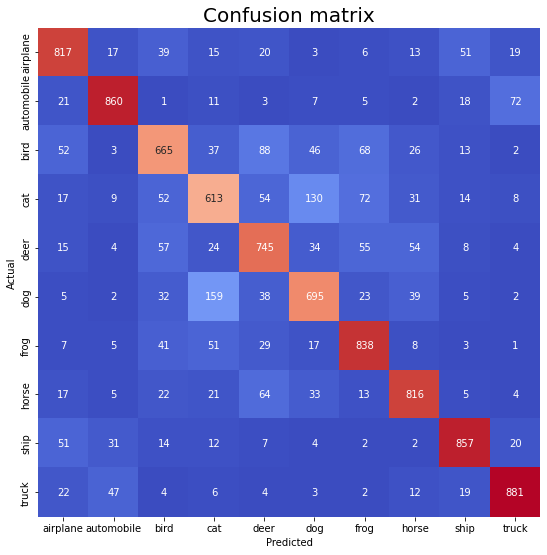

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = model_best.predict(testX)
predictions0 = np.argmax(predictions, axis=1)
cm = confusion_matrix(testy, predictions0)
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix', fontsize=20)
plt.show()